In [1]:
import numpy as np
import pandas as pd

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
!kaggle datasets download -d willianoliveiragibin/healthcare-insurance

Dataset URL: https://www.kaggle.com/datasets/willianoliveiragibin/healthcare-insurance
License(s): CC0-1.0
  0% 0.00/16.0k [00:00<?, ?B/s]
100% 16.0k/16.0k [00:00<00:00, 68.6MB/s]


In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/healthcare-insurance.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
df = pd.read_csv('/content/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
import matplotlib.pyplot as plt

In [8]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [10]:
import seaborn as sns

In [11]:
df.sex.value_counts(normalize = True)

,proportion
sex,
male,0.505232
female,0.494768


In [12]:
df.smoker.value_counts(normalize = True)

,proportion
smoker,
no,0.795217
yes,0.204783


In [13]:
df.region.value_counts(normalize = True)

,proportion
region,
southeast,0.272048
southwest,0.242900
northwest,0.242900
northeast,0.242152


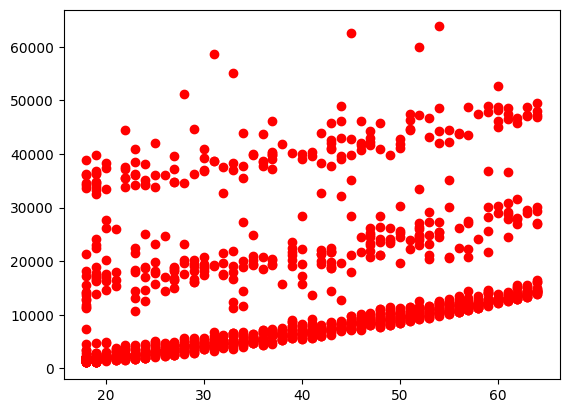

In [14]:
plt.scatter(df.age, df.charges, color = 'red')
# somewhat linear relation

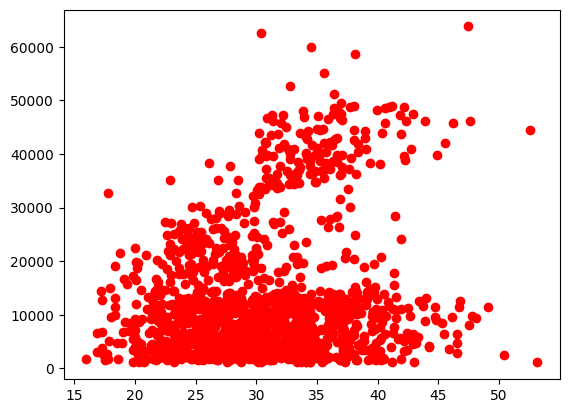

In [15]:
plt.scatter(df.bmi, df.charges, color = 'red')
# kind a linear relation

<Axes: ylabel='proportion'>

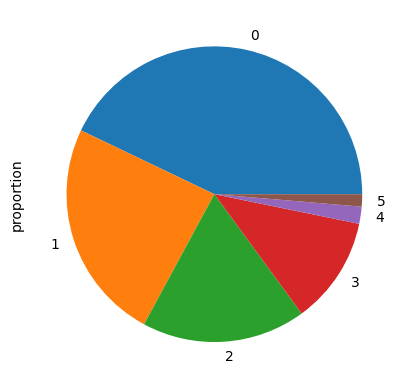

In [16]:
df.children.value_counts(normalize = True).plot(kind = 'pie')

/tmp/ipython-input-17-1621281958.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.bmi) # almost normally distributed


<Axes: xlabel='bmi', ylabel='Density'>

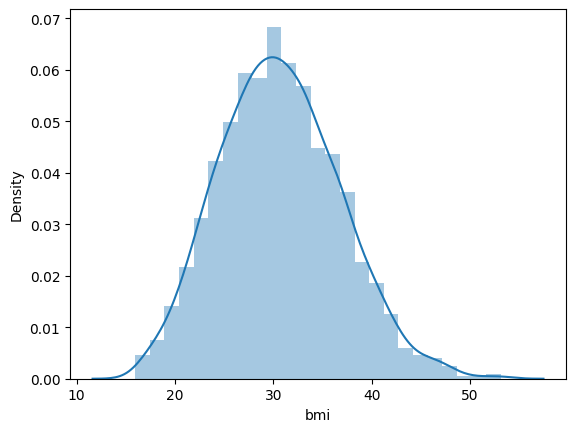

In [17]:
sns.distplot(df.bmi) # almost normally distributed

(array([166.,  56.,  56.,  84.,  55.,  54.,  78.,  50.,  50.,  52.,  81.,
         56.,  58.,  86.,  58.,  56.,  78.,  50.,  46.,  68.]),
 array([18. , 20.3, 22.6, 24.9, 27.2, 29.5, 31.8, 34.1, 36.4, 38.7, 41. ,
        43.3, 45.6, 47.9, 50.2, 52.5, 54.8, 57.1, 59.4, 61.7, 64. ]),
 <BarContainer object of 20 artists>)

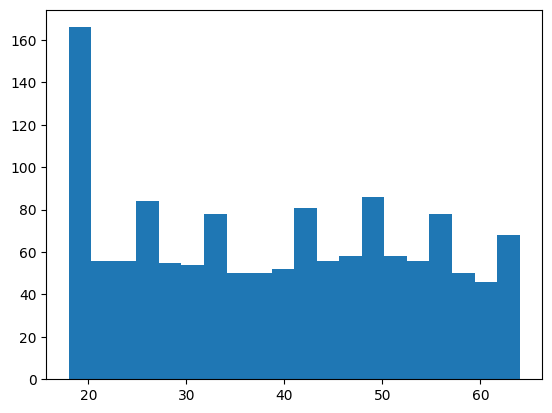

In [18]:
plt.hist(df.age, bins = 20)

<Axes: xlabel='children'>

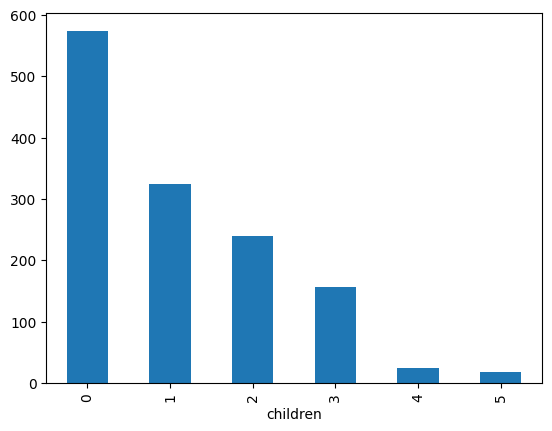

In [19]:
df.children.value_counts().plot(kind = 'bar')

In [20]:
df.sex = df.sex.apply(lambda x: 1 if x=='male' else 0)
df.smoker = df.smoker.apply(lambda x: 1 if x=='yes' else 0)

In [21]:
df.sex.value_counts()

,count
sex,
1,676
0,662


In [22]:
df = df.join(pd.get_dummies(df.region, dtype = float))

In [23]:
df.drop(columns = ['region'], inplace = True)

In [24]:
df

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0.0,0.0,0.0,1.0
1,18,1,33.770,1,0,1725.55230,0.0,0.0,1.0,0.0
2,28,1,33.000,3,0,4449.46200,0.0,0.0,1.0,0.0
3,33,1,22.705,0,0,21984.47061,0.0,1.0,0.0,0.0
4,32,1,28.880,0,0,3866.85520,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,0.0,1.0,0.0,0.0
1334,18,0,31.920,0,0,2205.98080,1.0,0.0,0.0,0.0
1335,18,0,36.850,0,0,1629.83350,0.0,0.0,1.0,0.0
1336,21,0,25.800,0,0,2007.94500,0.0,0.0,0.0,1.0


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'smoker'}>,
        <Axes: title={'center': 'charges'}>],
       [<Axes: title={'center': 'northeast'}>,
        <Axes: title={'center': 'northwest'}>,
        <Axes: title={'center': 'southeast'}>],
       [<Axes: title={'center': 'southwest'}>, <Axes: >, <Axes: >]],
      dtype=object)

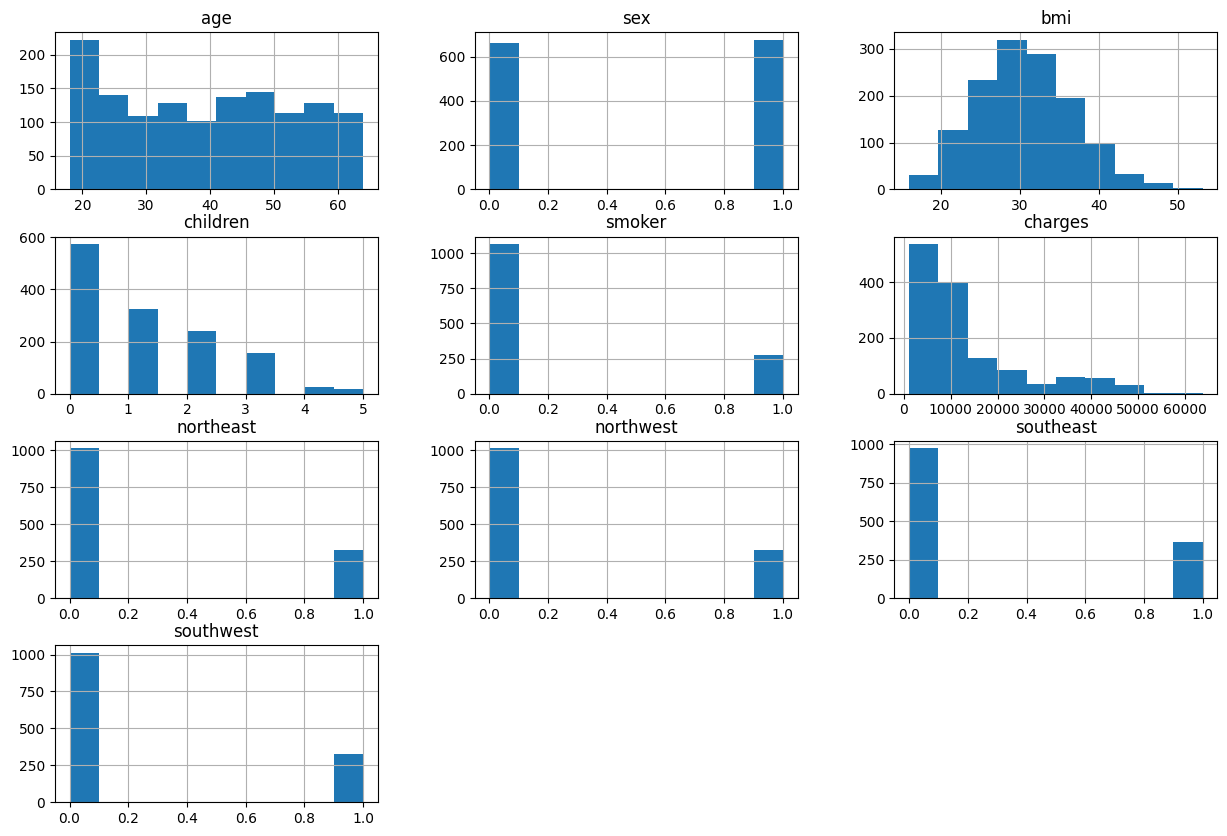

In [25]:
df.hist(figsize = (15,10))

### NO skewness in the data

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        1338 non-null   int64  
 1   sex        1338 non-null   int64  
 2   bmi        1338 non-null   float64
 3   children   1338 non-null   int64  
 4   smoker     1338 non-null   int64  
 5   charges    1338 non-null   float64
 6   northeast  1338 non-null   float64
 7   northwest  1338 non-null   float64
 8   southeast  1338 non-null   float64
 9   southwest  1338 non-null   float64
dtypes: float64(6), int64(4)
memory usage: 104.7 KB


<Axes: >

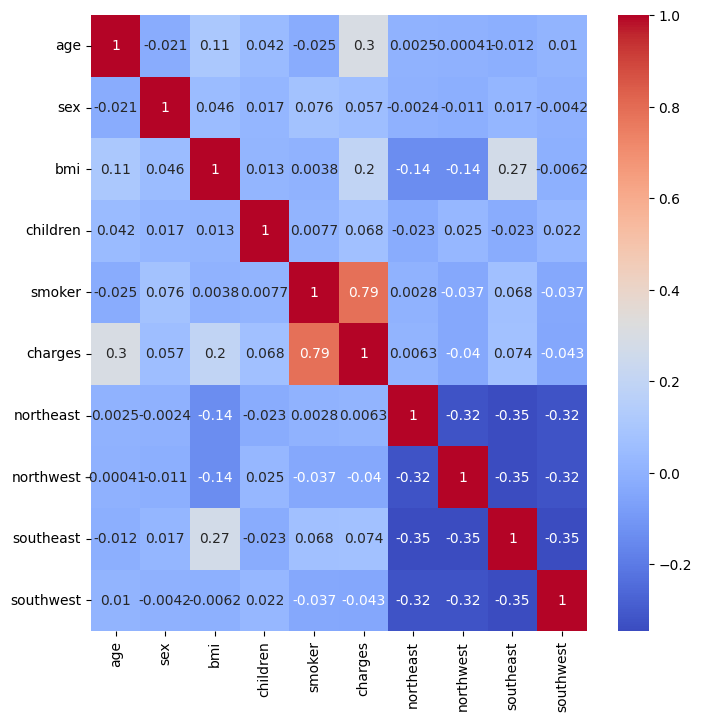

In [27]:
cor_matrix = df.corr()
plt.figure(figsize = (8,8))
sns.heatmap(cor_matrix, annot = True,cmap = 'coolwarm')

### smokers have maximum correlation with charges

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

In [29]:
x = df.drop(columns = ['charges'])

In [30]:
y = df.charges
x

,age,sex,bmi,children,smoker,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,0.0,0.0,0.0,1.0
1,18,1,33.770,1,0,0.0,0.0,1.0,0.0
2,28,1,33.000,3,0,0.0,0.0,1.0,0.0
3,33,1,22.705,0,0,0.0,1.0,0.0,0.0
4,32,1,28.880,0,0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,0.0,1.0,0.0,0.0
1334,18,0,31.920,0,0,1.0,0.0,0.0,0.0
1335,18,0,36.850,0,0,0.0,0.0,1.0,0.0
1336,21,0,25.800,0,0,0.0,0.0,0.0,1.0


In [31]:
from sklearn.preprocessing import StandardScaler
sca = StandardScaler()
x_sca = sca.fit_transform(x)
x_sca

array([[-1.43876426, -1.0105187 , -0.45332   , ..., -0.56641788,
        -0.61132367,  1.76548098],
       [-1.50996545,  0.98959079,  0.5096211 , ..., -0.56641788,
         1.63579466, -0.56641788],
       [-0.79795355,  0.98959079,  0.38330685, ..., -0.56641788,
         1.63579466, -0.56641788],
       ...,
       [-1.50996545, -1.0105187 ,  1.0148781 , ..., -0.56641788,
         1.63579466, -0.56641788],
       [-1.29636188, -1.0105187 , -0.79781341, ..., -0.56641788,
        -0.61132367,  1.76548098],
       [ 1.55168573, -1.0105187 , -0.26138796, ...,  1.76548098,
        -0.61132367, -0.56641788]])

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)
x_train.shape

(1070, 9)

In [33]:
depth = 3
model1 = RandomForestRegressor(n_estimators = 100, max_depth = depth)

In [34]:
model1.fit(x_train, y_train)

RandomForestRegressor(max_depth=3)

In [35]:
from sklearn.metrics import r2_score
y_pred = model1.predict(x_test)

In [36]:
r2_score(y_pred, y_test)

0.8453063467869516

In [37]:
from sklearn.metrics import root_mean_squared_error
root_mean_squared_error(y_pred, y_test)

4556.754395008451

In [38]:
r2 = []
for depth in range(1,10):
  model = RandomForestRegressor(n_estimators = 100, max_depth = depth)
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  score = r2_score(y_pred, y_test)
  r2.append(score)

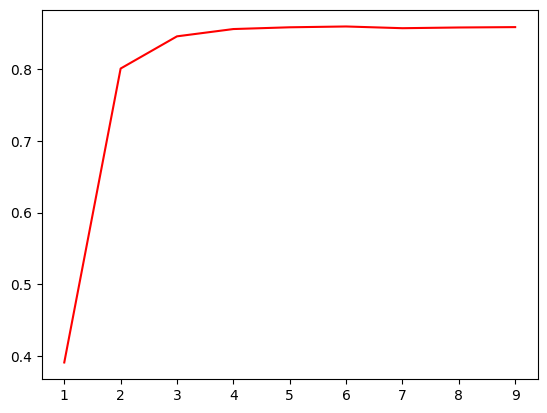

In [39]:
plt.plot(range(1,10), r2, color = 'red')
plt.xticks()
plt.show()

In [40]:
r2

[0.39115096399956284,
 0.8006546303683092,
 0.8455076621537327,
 0.8556659175193042,
 0.8581143427409897,
 0.8592452823242521,
 0.8568483179789617,
 0.8578370139844804,
 0.8583582831575971]

### max_depth = 5 gives maximum r2_score

In [41]:
model2 = LinearRegression()
model2.fit(x_train, y_train)
y_pred2 = model2.predict(x_test)
r2_score(y_pred2 , y_test)

0.7088351277198341

In [42]:
model.score(x_test, y_test)

0.8686931970252801

In [43]:
model2.score(x_test, y_test)

0.7835929767120723

In [44]:
root_mean_squared_error(y_pred2, y_test)

5796.2846592762735

In [45]:
from sklearn.metrics import mean_absolute_error
mae1 = mean_absolute_error(y_pred, y_test)
mae2 = mean_absolute_error(y_pred2, y_test)
print("Random Forest MAE:", mae1)
print("Logistic Regression MAE:", mae2)

Random Forest MAE: 2448.071757717429
Logistic Regression MAE: 4181.194473753643


Text(0.5, 1.0, 'Truth vs Predictions')

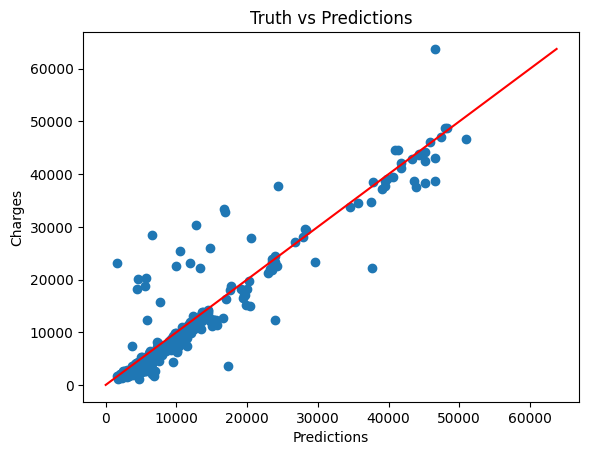

In [46]:
plt.scatter(y_pred, y_test)
plt.plot(np.linspace(0, max(y_test)),np.linspace(0, max(y_test)), color = 'red')
plt.xlabel('Predictions')
plt.ylabel('Charges')
plt.title('Truth vs Predictions')

Random Forest fits much better.

Text(0.5, 1.0, 'Truth vs Predictions')

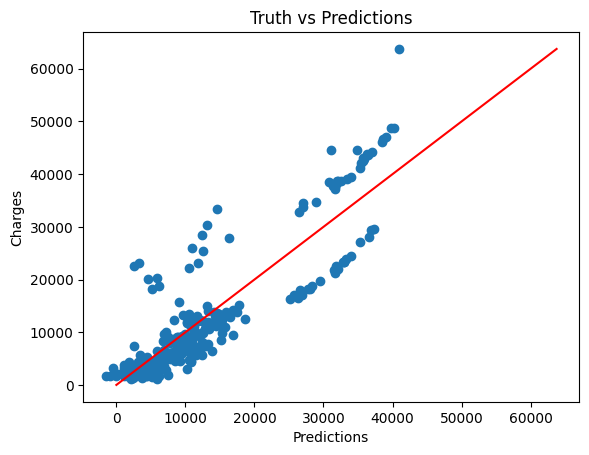

In [47]:
plt.scatter(y_pred2, y_test)
plt.plot(np.linspace(0, max(y_test)),np.linspace(0, max(y_test)), color = 'red')
plt.xlabel('Predictions')
plt.ylabel('Charges')
plt.title('Truth vs Predictions')

for Linear regression model , points are a bit off.

In [48]:
feature_importances = sorted(zip(model.feature_names_in_, model.feature_importances_), key = lambda x: x[1], reverse = True)

Text(0.5, 1.0, 'Feature importances')

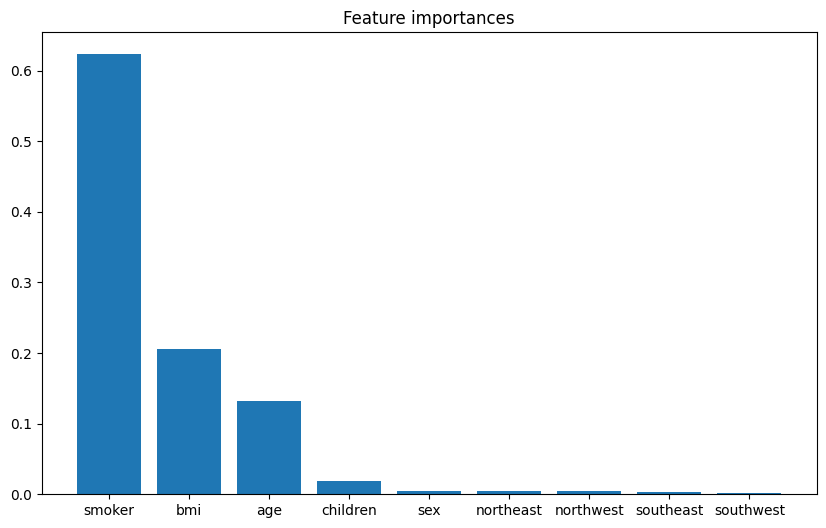

In [49]:
plt.figure(figsize = (10,6))
plt.bar([x[0] for x in feature_importances], [x[1] for x in feature_importances])
plt.title("Feature importances")

now lets see, if we drop sex, regions, then what will the model result, or rather say how about we go for a regualarization technique.

In [50]:
x_exp_train = x_train.drop(columns = ['sex', 'northeast','southeast','northwest','southwest'])
x_exp_test = x_test.drop(columns = ['sex', 'northeast','southeast','northwest','southwest'])

In [51]:
model.fit(x_exp_train, y_train)
model.score(x_exp_test, y_test)
y_exp_pred = model.predict(x_exp_test)
r2_score(y_exp_pred, y_test) # score reduced, shouldn't remove like that
print(mean_absolute_error(y_exp_pred, y_test)) # increased a bit :(

2474.9927198956952


In [52]:
# hyper parameter tuning using gridsearchCV
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth':[None, 2, 5],
    'min_samples_split': [2,4,6,8],
    'min_samples_leaf': [1,2,4,6]
}

# cross validation f1, f2, f3, f4, f5
# training on 3*4*4 models each for 5 folds that is 5 times so 240 times training model
model = RandomForestRegressor(n_jobs = -1)
grid_search = GridSearchCV(model, param_grid = param_grid, cv = 5)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1),
             param_grid={'max_depth': [None, 2, 5],
                         'min_samples_leaf': [1, 2, 4, 6],
                         'min_samples_split': [2, 4, 6, 8]})

In [53]:
grid_search.best_params_

{'max_depth': 5, 'min_samples_leaf': 6, 'min_samples_split': 4}

In [54]:
model3 = RandomForestRegressor(n_estimators = 100, max_depth = 5, min_samples_split=4, min_samples_leaf = 6)

In [55]:
model3.fit(x_train, y_train)
model3.score(x_test, y_test)

0.8795988343728617

increased by a percent %

In [80]:
y_pred3 = model3.predict(x_test)
print(r2_score(y_test, y_pred3))
print(root_mean_squared_error(y_pred3, y_test))

0.8795988343728617
4323.439398643646


In [58]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

In [115]:
model4 = Sequential()
model4.add(Dense(64, input_dim = 9, activation = 'relu'))
model4.add(BatchNormalization())
model4.add(Dense(32, activation = 'relu'))
model4.add(BatchNormalization())
model4.add(Dropout(0.5))
model4.add(Dense(32, activation = 'relu'))
model4.add(Dropout(0.25))
model4.add(Dense(1, activation = 'linear'))
model4.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_37 (Dense)                │ (None, 64)             │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,193 (16.38 KB)

 Trainable params: 4,001 (15.63 KB)

 Non-trainable params: 192 (768.00 B)

In [116]:
model4.compile(loss = 'mean_squared_error',metrics = ['mae'], optimizer = 'adam')
history = model4.fit(x_train, y_train_sca,epochs = 35, validation_split = 0.2, verbose = 0)

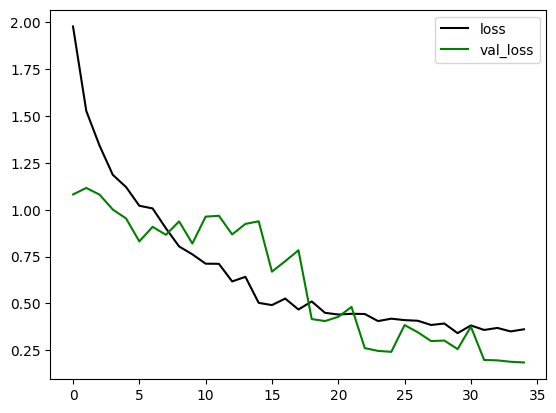

In [117]:
plt.plot(history.history['loss'], label = 'loss', color = 'black')
plt.plot(history.history['val_loss'], label = 'val_loss', color ='green')
plt.legend()
plt.show()

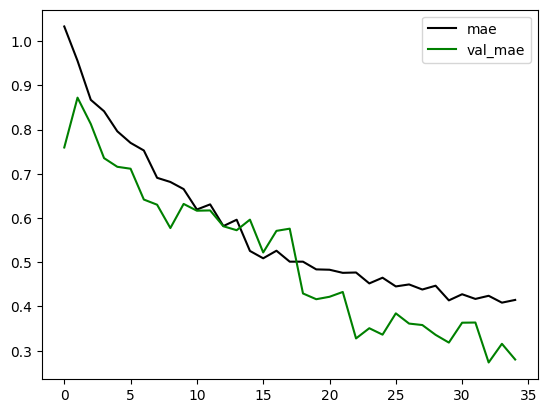

In [118]:
plt.plot(history.history['mae'], label = 'mae', color = 'black')
plt.plot(history.history['val_mae'], label = 'val_mae', color ='green')
plt.legend()
plt.show()

In [101]:
y_train_sca = (y_train - np.mean(y_train))/np.std(y_train)
y_test_sca = (y_test - np.mean(y_test))/np.std(y_test)

In [121]:
y_pred4 = model4.predict(x_test)
r2_score(y_pred4, y_test_sca)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


0.7527060175756636

In [120]:
y_pred4 = y_pred4*np.std(y_test) + np.mean(y_test)
root_mean_squared_error(y_pred4, y_test)

4994.442542418129

clearly, Random Forest gives maximum r2 score of 0.8795
after that ANN gives r2 score of 0.8458
and at the last lowest r2 score is given by Linear Regression model of 0.78 something

(array([287., 249., 205., 193.,  71.,  58.,  46.,  40.,  25.,  10.,  25.,
         34.,  30.,  27.,  22.,  10.,   1.,   1.,   2.,   2.]),
 array([ 1121.8739   ,  4254.3016055,  7386.729311 , 10519.1570165,
        13651.584722 , 16784.0124275, 19916.440133 , 23048.8678385,
        26181.295544 , 29313.7232495, 32446.150955 , 35578.5786605,
        38711.006366 , 41843.4340715, 44975.861777 , 48108.2894825,
        51240.717188 , 54373.1448935, 57505.572599 , 60638.0003045,
        63770.42801  ]),
 <BarContainer object of 20 artists>)

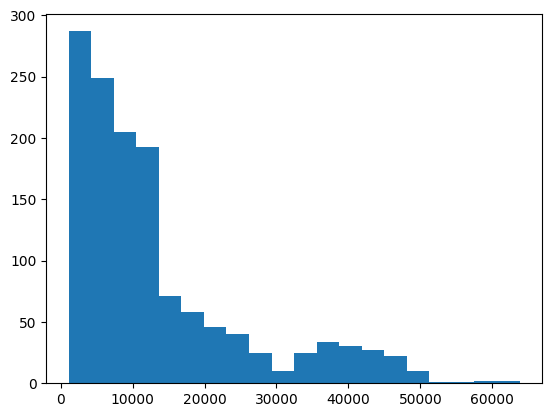

In [122]:
plt.hist(df.charges, bins = 20)

the target variable is positively skewed. lets try normalizing it before feeding data into Random Forest

In [123]:
model.fit(x_train, y_train_sca)

RandomForestRegressor(n_jobs=-1)

In [124]:
y_pred5 = model.predict(x_test)
r2_score(y_pred5, y_test_sca)

0.8583012177034174

doesn't makes it better though !!